In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [ ]:
df = pd.read_csv('/tmp/results.csv')
dfc = df.copy()

In [ ]:
dfc.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [ ]:
dfc.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
dfc.date = pd.to_datetime(dfc.date)

In [ ]:
print('We are dealing with {} rows of data and {} columns'.format(dfc.shape[0], dfc.shape[1]))

We are dealing with 42899 rows of data and 9 columns


In [ ]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,42899.0,1.742395,1.751472,0.0,1.0,1.0,2.0,31.0
away_score,42899.0,1.184270,1.401450,0.0,0.0,1.0,2.0,21.0


In [ ]:
print("The data records goes back to {} and up to {} \n".format(dfc.date.min(), dfc.date.max()))
print("The time frame is {} years".format(round((dfc.date.max() - dfc.date.min()) / np.timedelta64(1, 'Y')), 2))

The data records goes back to 1872-11-30 00:00:00 and up to 2021-10-27 00:00:00 

The time frame is 149 years


In [ ]:
dfc.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Text(0, 0.5, '')

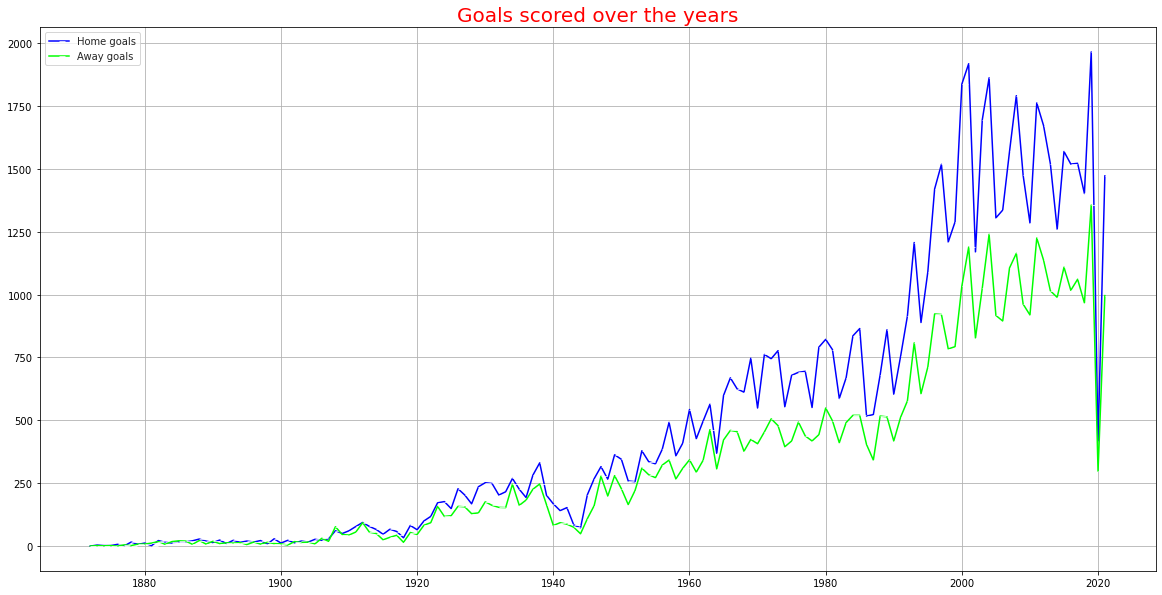

In [ ]:
subdf0 = dfc.groupby(dfc.date.dt.year).agg({'home_score': 'sum',
                                   'away_score': 'sum'}).reset_index()
plt.figure(figsize = (20, 10))
sns.lineplot(x = subdf0.date, y = subdf0.home_score, data = subdf0, color = 'b', marker = True, )
sns.lineplot(x = subdf0.date, y = subdf0.away_score, data = subdf0, color = 'lime', marker = True, dashes = True)
plt.grid(True)
sns.set_style("whitegrid")
plt.title('Goals scored over the years', fontsize = 20, color = 'r')
plt.legend(labels=["Home goals","Away goals"])
plt.xlabel("")
plt.ylabel("")

In [ ]:
print("More goals are scored as time passes, could it be because more games are being played over \ntime?")

More goals are scored as time passes, could it be because more games are being played over 
time?


No handles with labels found to put in legend.


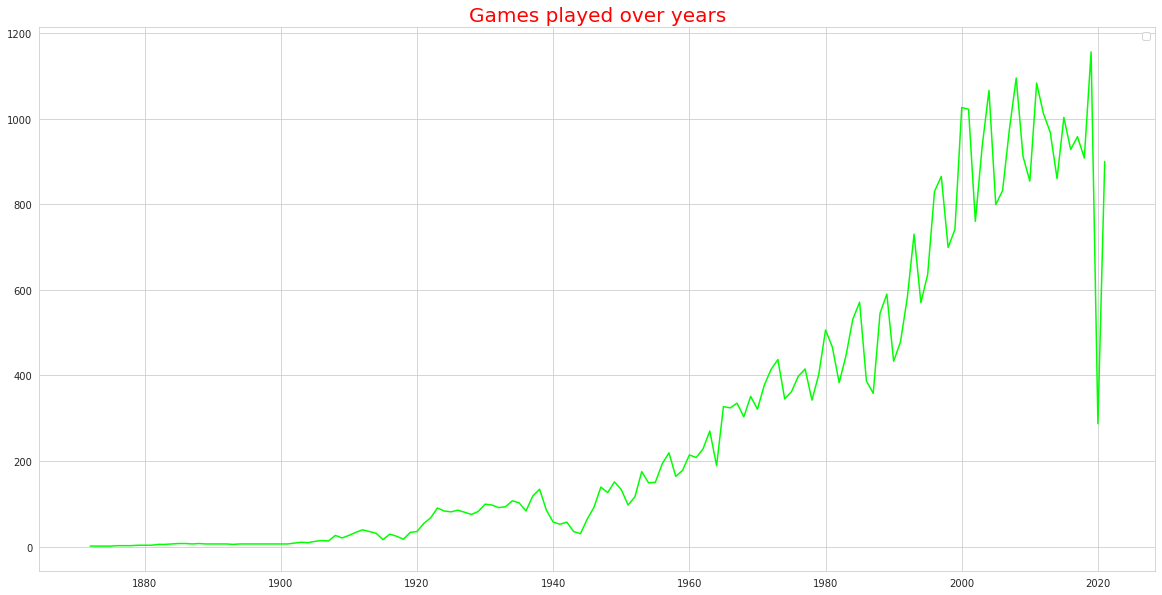

In [ ]:
temp = dfc.date.dt.year.value_counts().reset_index()
temp = temp.rename(columns = {'index': 'Year',
                      'date': 'Games played'})

temp.Year = pd.to_datetime(temp.Year, format = '%Y')
temp.Year = temp.Year.dt.year
temp.sort_values(by = 'Year', ascending=True, inplace = True)

temp = dfc.date.dt.year.value_counts().reset_index()
temp = temp.rename(columns = {'index': 'Year',
                      'date': 'Games played'})
plt.figure(figsize = (20, 10))
sns.lineplot(x = temp.Year, y = temp['Games played'], data = temp, color = 'lime', markers = True, dashes = True)
plt.title('Games played over years', fontsize = 20, color = 'r')

sns.set_style("whitegrid")
plt.grid("True")
plt.xlabel("")
plt.ylabel("")
plt.legend()

In [ ]:
print('We can see that an identical pattern to the goals scored is forming, this shows that more \ngames being played is the main reason why more goals are scored.')

We can see that an identical pattern to the goals scored is forming, this shows that more 
games being played is the main reason why more goals are scored.


<Figure size 1440x1080 with 0 Axes>

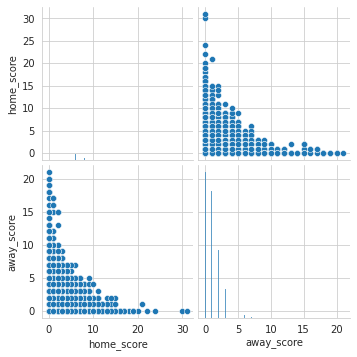

In [ ]:
plt.figure(figsize = (20, 15))
sns.pairplot(dfc.iloc[:, 3:5])

In [ ]:
df1 = dfc[dfc.tournament == 'Friendly']
df2 = dfc[dfc.tournament != 'Friendly']
df1['Total goals'] = df1['home_score'] + df1['away_score']
df2['Total goals'] = df2['home_score'] + df2['away_score']
df1_totalg = df1['Total goals'].sum()
df2_totalg = df2['Total goals'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tot = df2_totalg + df1_totalg
tot0 = ((df2_totalg - df1_totalg) / tot) * 100
print('Goals scored in all friendly games are {}, and goals scored in offical games are {}. \nWhich means that during official games, {:.2f}% more goals are scored.'.format(df1_totalg, df2_totalg, tot0))

Goals scored in all friendly games are 49991, and goals scored in offical games are 75560. 
Which means that during official games, 20.37% more goals are scored.


In [ ]:
#HOME GAMES

teams_list = dfc.country.unique()

teams_list = dfc.country.unique()
x = 0

teams_scores = []


for n in range(teams_list.shape[0]):
    x = 0
    l1 = teams_list[n]
    for i in dfc.home_team:
        try:
            if l1 == dfc.home_team[x]:
                score = dfc.home_score[x] - dfc.away_score[x]
                teams_scores.append((dfc.date[x], l1, score, dfc.home_score[x]))
        except:
            break
        x += 1
        
d = {'main': teams_scores}
teams_home_df = pd.DataFrame(data=d)

teams_home_df['Date'], teams_home_df['Team'], teams_home_df['Score'], teams_home_df['Home goals'] = zip(*teams_home_df.main)
teams_home_dfc = teams_home_df.copy()
teams_home_dfc.drop('main', axis = 1, inplace = True)

In [ ]:
#AWAY GAMES

teams_list = dfc.country.unique()
x = 0

teams_scores0 = []


for n in range(teams_list.shape[0]):
    x = 0
    l1 = teams_list[n]
    for i in dfc.away_team:
        try:
            if l1 == dfc.away_team[x]:
                score0 = dfc.away_score[x] - dfc.home_score[x]
                teams_scores0.append((dfc.date[x], l1, score0, dfc.away_score[x]))
        except:
            break
        x += 1
        
d = {'main': teams_scores0}
teams_away_df = pd.DataFrame(data=d)

teams_away_df['Date'], teams_away_df['Team'], teams_away_df['Score'], teams_away_df['Away goals'] = zip(*teams_away_df.main)
teams_away_dfc = teams_away_df.copy()
teams_away_dfc.drop('main', axis = 1, inplace = True)

In [ ]:
conditions = [
    (teams_away_dfc['Score'] < 0) ,
    (teams_away_dfc['Score'] == 0) ,
    (teams_away_dfc['Score'] > 0)]
choices = ['L', 'D', 'W']
teams_away_dfc['W/L0'] = np.select(conditions, choices, default='black')

In [ ]:
conditions = [
    (teams_home_dfc['Score'] < 0) ,
    (teams_home_dfc['Score'] == 0) ,
    (teams_home_dfc['Score'] > 0)]
choices = ['L', 'D', 'W']
teams_home_dfc['W/L0'] = np.select(conditions, choices, default='black')

In [ ]:
phva_away = teams_away_dfc.groupby('W/L0')['Team'].count().reset_index()
phva_home = teams_home_dfc.groupby('W/L0')['Team'].count().reset_index()

#We can now have a statistical idea on how different games are if played on home field vs away

In [ ]:
print("If a team is playing on their turf, the odds of them winning is {}%, as opposed to if \nthey were playing away, it is {}%. \n".format(round((phva_home.Team[2] / phva_home.Team.sum() * 100), 2), 
                                                                                                                                          round((phva_away.Team[2] / phva_away.Team.sum() * 100), 2)))
print("{}% of the games played at home ended up in a loss, and {}% in a draw. When playing \naway, {}% of the games ended up in a loss and {}% in a draw.".format(
                                                                                                                                                        round((phva_home.Team[1] / phva_home.Team.sum() * 100), 2) ,
                                                                                                                                                        round((phva_home.Team[0] / phva_home.Team.sum() * 100), 2),
                                                                                                                                                        round((phva_away.Team[1] / phva_away.Team.sum() * 100), 2),
                                                                                                                                                        round((phva_away.Team[0] / phva_away.Team.sum() * 100), 2)
                                                                                                                                                                ))

If a team is playing on their turf, the odds of them winning is 48.68%, as opposed to if 
they were playing away, it is 28.34%. 

28.18% of the games played at home ended up in a loss, and 23.15% in a draw. When playing 
away, 48.47% of the games ended up in a loss and 23.19% in a draw.


In [ ]:
teams_home_dfc.head(3)

,Date,Team,Score,Home goals,W/L0
0,1872-11-30,Scotland,0,0,D
1,1874-03-07,Scotland,1,2,W
2,1876-03-04,Scotland,3,3,W


In [ ]:
teams_away_dfc.head(3)

,Date,Team,Score,Away goals,W/L0
0,1873-03-08,Scotland,-2,2,L
1,1875-03-06,Scotland,0,2,D
2,1877-03-03,Scotland,2,3,W


In [ ]:
print(teams_home_dfc.describe().T, "\n")
print("--------------------------------------\n\n", teams_away_dfc.describe().T)

              count      mean       std   min  25%  50%  75%   max
Score       42259.0  0.570222  2.348855 -21.0 -1.0  0.0  2.0  31.0
Home goals  42259.0  1.738565  1.744478   0.0  1.0  1.0  2.0  31.0 

--------------------------------------

               count      mean       std   min  25%  50%  75%   max
Score       42245.0 -0.543449  2.340143 -30.0 -2.0  0.0  1.0  21.0
Away goals  42245.0  1.178767  1.384252   0.0  0.0  1.0  2.0  21.0


NameError: ignored

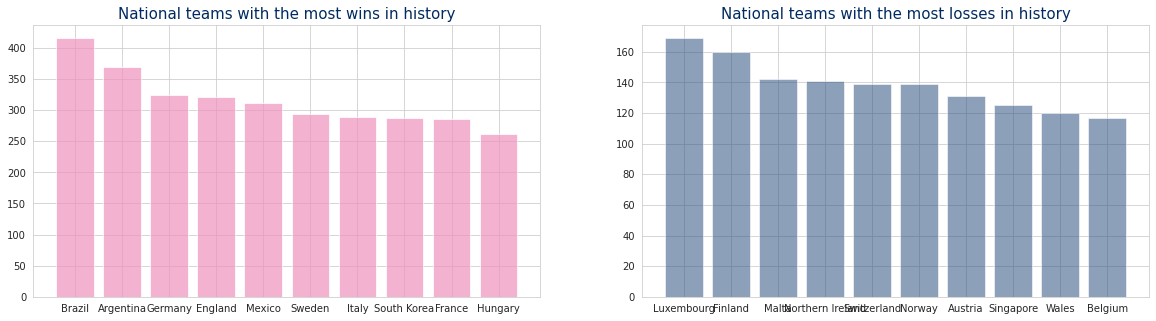

In [ ]:
WL_per_team = teams_home_dfc.groupby(['Team', 'W/L0'])['W/L0'].count().reset_index(name='count')

W = WL_per_team[WL_per_team['W/L0'] == 'W']
D = WL_per_team[WL_per_team['W/L0'] == 'D']
L = WL_per_team[WL_per_team['W/L0'] == 'L']           #Breaking down the DF

top10_W = W.sort_values(by = 'count', ascending = False ).head(10)
top10_L = L.sort_values(by = 'count', ascending = False ).head(10)
top10_D = D.sort_values(by = 'count', ascending = False ).head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
sns.set_style('darkgrid')
ax1.bar(top10_W['Team'], top10_W['count'], color = '#f092be', alpha = .7)
ax1.set_title('National teams with the most wins in history', fontsize = 15, color = '#002a61')

ax2.bar(top10_L['Team'], top10_L['count'], color = '#305382', alpha = .55)
ax2.set_title('National teams with the most losses in history', fontsize = 15, color = '#002a61')
sns.set_style("darkgrid")

ax1.set_xticklabels(labels, rotation=30) 
ax2.set_xticklabels(labels, rotation=30)

plt.show()

In [ ]:
#Removing the negative values from the Score column 

teams_home_dfcc = teams_home_dfc.copy()
teams_away_dfcc = teams_away_dfc.copy()

x = 0

for i in teams_home_dfcc['Score']:
    if teams_home_dfcc.Score[x] < 0:
        teams_home_dfcc.Score[x] = 0
    x += 1
    
#---------------------------------------------------

s = 0

for n in teams_away_dfcc['Score']:
    if teams_away_dfcc.Score[s] < 0:
        teams_away_dfcc.Score[s] = 0
    s += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



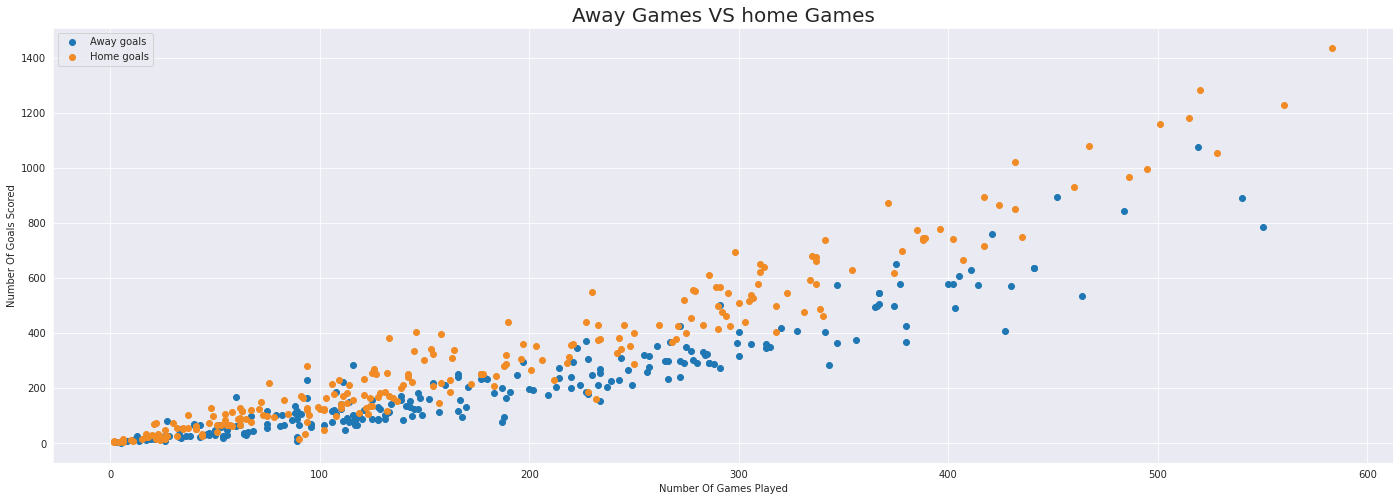

In [ ]:
grp_away = teams_away_dfcc.groupby('Team').agg({'Team': 'count',
                                           'Away goals': 'sum'})
grp_home = teams_home_dfcc.groupby('Team').agg({'Team': 'count',
                                           'Home goals': 'sum'})

#Let's plot the 
plt.figure(figsize = (24, 8))
plt.scatter(x = grp_away['Team'], y = grp_away['Away goals'])
plt.scatter(x = grp_home['Team'], y = grp_home['Home goals'], color = '#f08b26')
plt.title('Away Games VS home Games', fontsize = 20)
plt.xlabel("Number Of Games Played")
plt.ylabel("Number Of Goals Scored")
plt.legend(labels=["Away goals","Home goals"])

In [ ]:
print("We can see that we have a positive correlation between games played and goals scored. Even a stronger coorelation between Home goals and games played")

We can see that we have a positive correlation between games played and goals scored. Even a stronger coorelation between Home goals and games played


Text(0, 0.5, '')

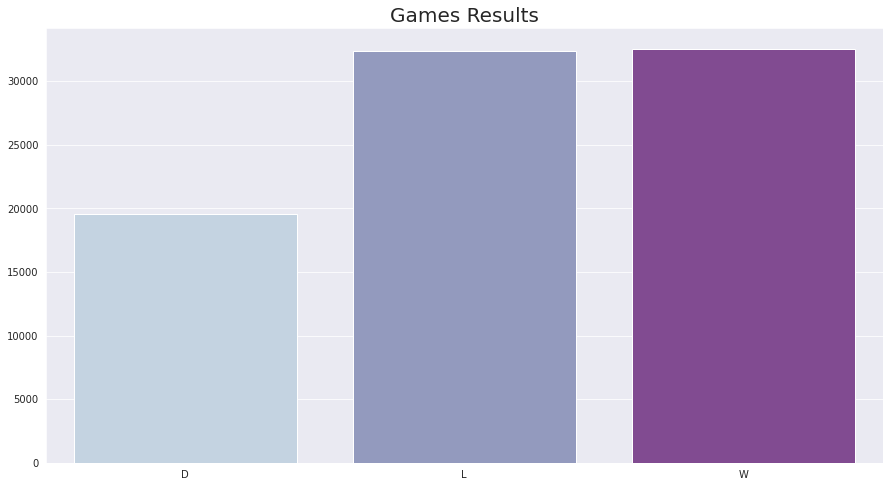

In [ ]:
result = pd.concat([phva_away, phva_home], axis=1)
result['Tot'] = result.iloc[:,1] + result.iloc[:,3]
result.drop(result.columns.difference(['W/L0','Tot']), 1, inplace=True)

plt.figure(figsize = (15, 8))
sns.barplot(x = result.iloc[:,0] , y = 'Tot', data = result, palette = 'BuPu', alpha = 1)

plt.title("Games Results", fontsize = 20)
plt.xlabel("")
plt.ylabel("")

In [ ]:
dfc.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Champ

In [ ]:
tournament = dfc.groupby("tournament").count()

tournament = tournament.drop(tournament.columns.difference(['date']), axis=1)
tournament = tournament.rename(columns={'date': 'Count'})
tournament = tournament.sort_values(by = 'Count', ascending = False).head(10)

In [ ]:
x = tournament.index
y = tournament.Count

fig = go.Figure(data=[go.Bar(x=x, y=y)])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='The most popular tournaments')
fig.show()

In [ ]:
dfc['Total goals'] = dfc['home_score'] + dfc['away_score']
tournament_goals = dfc.groupby('tournament').agg({'Total goals': 'sum'}).sort_values(by = "Total goals", ascending = False)
tournament_goals.drop(['Friendly'], axis = 0, inplace = True)
tournament_goals = tournament_goals.head(10)

Text(0, 0.5, '')

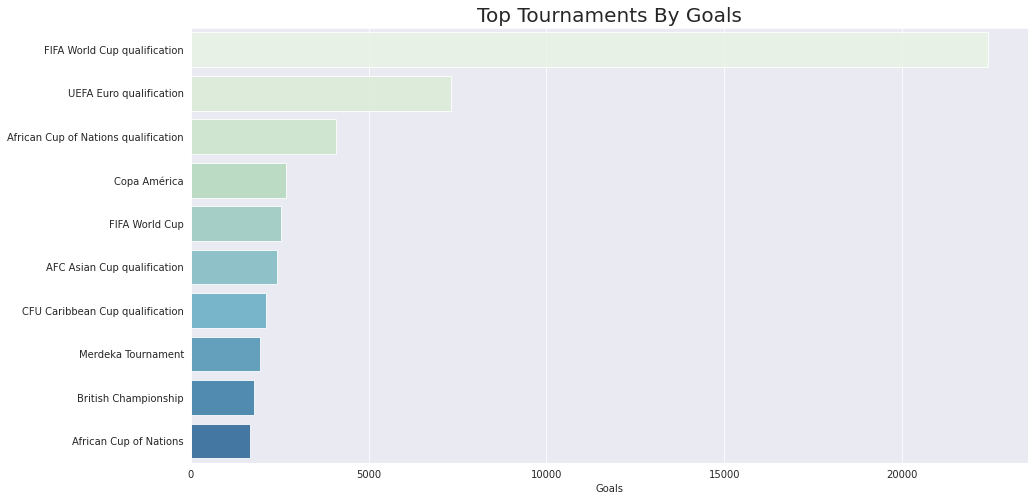

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Total goals', y = tournament_goals.index, palette = 'GnBu', data = tournament_goals, orient = 'h', alpha = .8)

plt.title("Top Tournaments By Goals", fontsize = 20)
plt.xlabel("Goals")
plt.ylabel("")

In [ ]:
countries = dfc.groupby(['date','country']).agg({'country': 'count'})
countries.rename(columns = {'country': 'count'}, inplace = True)

iso_alpha = pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes')
iso_alpha0 = iso_alpha[0]
iso_alpha0 = pd.DataFrame(iso_alpha0.to_records())

iso_alpha0 = iso_alpha0.rename(columns={iso_alpha0.columns[1]: 'Country', 
                                       iso_alpha0.columns[5]: 'Country Code'})

iso_alpha0 = iso_alpha0.rename(columns={'Country': 'country'})
iso_alpha0.drop(iso_alpha0.columns.difference(["country", "Country Code"]), 1, inplace=True)

iso_alpha0['country_name0'] = iso_alpha0['country'].str.split('[').str[0]
iso_alpha0['country_name0'] = iso_alpha0['country_name0'].str.replace('Viet Nam', 'Vietnam')
iso_alpha0['country_name0'] = iso_alpha0['country_name0'].str.strip()

iso_alpha0.drop('country', axis = 1, inplace = True)
iso_alpha0.rename(columns = {'country_name0': 'country'}, inplace = True)

main = pd.merge(countries, iso_alpha0, on="country")

In [ ]:
main = main.groupby(['country', 'Country Code']).agg({'count': 'sum'}).reset_index()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = main['Country Code'],
    z = main['count'],
    text = main['country'],
    colorscale = 'OrRd',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Games played',
))

fig.update_layout(
    title_text='Tournaments locations',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()